In [1]:
import paddle
import numpy as np
import matplotlib.pyplot as plt
print(paddle.__version__)

2.4.2


In [2]:
#设置默认的全局dtype为float64
paddle.set_default_dtype("float64")
#下载数据
print('下载并加载训练数据')
train_dataset = paddle.text.datasets.UCIHousing(mode='train')
eval_dataset = paddle.text.datasets.UCIHousing(mode='test')
train_loader = paddle.io.DataLoader(train_dataset, batch_size=32, shuffle=True)
eval_loader = paddle.io.DataLoader(eval_dataset, batch_size = 8, shuffle=False)
print('加载完成')

下载并加载训练数据
加载完成


In [3]:
# 定义全连接网络
class Regressor(paddle.nn.Layer):
    def __init__(self):
        super(Regressor, self).__init__()
        # 定义一层全连接层，输出维度是1，激活函数为None，即不使用激活函数
        self.linear = paddle.nn.Linear(13, 1, None)
    
    # 网络的前向计算函数
    def forward(self, inputs):
        x = self.linear(inputs)
        return x

In [4]:
Batch=0
Batchs=[]
all_train_loss=[]
def draw_train_loss(Batchs, train_loss):
    title="training loss"
    plt.title(title, fontsize=24)
    plt.xlabel("batch", fontsize=14)
    plt.ylabel("loss", fontsize=14)
    plt.plot(Batchs, train_loss, color='red', label='training loss')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
model=Regressor() # 全连接神经网络模型实例化
model.train() # 进入训练模式
mse_loss = paddle.nn.MSELoss()# 损失函数
opt=paddle.optimizer.SGD(learning_rate=0.0005, parameters=model.parameters())#梯度下降优化器
epochs_num=2000 #迭代次数

#2000次迭代训练
for pass_num in range(epochs_num):
    #遍历训练集中所有数据
    #获取图像和标签数据，将图像传入模型进行预测并获取损失值
    for batch_id,data in enumerate(train_loader()):
        image = data[0]
        label = data[1]
        predict = model(image) #数据传入model
        loss=mse_loss(predict,label)
        #每训练十个数据，打印并将损失值存入列表
        if batch_id!=0 and batch_id%10==0:
            Batch = Batch + 10 
            Batchs.append(Batch)
            all_train_loss.append(loss.numpy()[0])
            print("epoch:{},step:{},train_loss:{}".format(pass_num,batch_id,loss.numpy()[0])  )      
        loss.backward() # 反向传播计算梯度      
        opt.step() # 更新模型参数
        opt.clear_grad()   #重置梯度
paddle.save(model.state_dict(),'Regressor')#保存模型

epoch:0,step:10,train_loss:635.7650375610283
epoch:1,step:10,train_loss:736.1490408771142
epoch:2,step:10,train_loss:702.050160001578
epoch:3,step:10,train_loss:474.6734770163647
epoch:4,step:10,train_loss:645.4402038241833
epoch:5,step:10,train_loss:629.3355910648642
epoch:6,step:10,train_loss:539.6606356891483
epoch:7,step:10,train_loss:610.6460411116896
epoch:8,step:10,train_loss:647.6019334968103
epoch:9,step:10,train_loss:521.483983516394
epoch:10,step:10,train_loss:383.5608364842128
epoch:11,step:10,train_loss:489.45195103994087
epoch:12,step:10,train_loss:474.34672031887044
epoch:13,step:10,train_loss:464.07975429507684
epoch:14,step:10,train_loss:493.6186486882591
epoch:15,step:10,train_loss:454.8687070960012
epoch:16,step:10,train_loss:404.20647238790997
epoch:17,step:10,train_loss:438.99094575037657
epoch:18,step:10,train_loss:369.1444661475973
epoch:19,step:10,train_loss:425.16083484333285
epoch:20,step:10,train_loss:467.20225232971416
epoch:21,step:10,train_loss:439.0915287

epoch:189,step:10,train_loss:74.48554419947179
epoch:190,step:10,train_loss:57.59482055148135
epoch:191,step:10,train_loss:76.8095153989812
epoch:192,step:10,train_loss:56.48616354193295
epoch:193,step:10,train_loss:81.06123008393268
epoch:194,step:10,train_loss:63.688950043587475
epoch:195,step:10,train_loss:19.516929258707293
epoch:196,step:10,train_loss:48.315863048842125
epoch:197,step:10,train_loss:97.55592888230473
epoch:198,step:10,train_loss:39.4667035230508
epoch:199,step:10,train_loss:40.70576374872441
epoch:200,step:10,train_loss:107.4021104526944
epoch:201,step:10,train_loss:67.1088659365482
epoch:202,step:10,train_loss:27.65667659592185
epoch:203,step:10,train_loss:97.34308787035076
epoch:204,step:10,train_loss:72.19798470366983
epoch:205,step:10,train_loss:90.03816303445878
epoch:206,step:10,train_loss:28.54237472060146
epoch:207,step:10,train_loss:52.002361055668445
epoch:208,step:10,train_loss:58.82422035076764
epoch:209,step:10,train_loss:54.45128510383078
epoch:210,st

epoch:364,step:10,train_loss:18.713111361308616
epoch:365,step:10,train_loss:49.9696384739198
epoch:366,step:10,train_loss:84.77116710114595
epoch:367,step:10,train_loss:48.12161817368914
epoch:368,step:10,train_loss:32.68207273090347
epoch:369,step:10,train_loss:45.3934725158374
epoch:370,step:10,train_loss:55.26791462732835
epoch:371,step:10,train_loss:35.32314407364166
epoch:372,step:10,train_loss:33.0023681661343
epoch:373,step:10,train_loss:22.56979594287261
epoch:374,step:10,train_loss:53.57811391108236
epoch:375,step:10,train_loss:32.49245114103448
epoch:376,step:10,train_loss:39.91094553274632
epoch:377,step:10,train_loss:52.88591152791672
epoch:378,step:10,train_loss:37.827067002188045
epoch:379,step:10,train_loss:43.7594941000246
epoch:380,step:10,train_loss:36.69865937916913
epoch:381,step:10,train_loss:26.623430092558465
epoch:382,step:10,train_loss:85.51988695531095
epoch:383,step:10,train_loss:67.55940890122137
epoch:384,step:10,train_loss:56.70694633647164
epoch:385,step

epoch:550,step:10,train_loss:59.45515854837698
epoch:551,step:10,train_loss:40.65073685827646
epoch:552,step:10,train_loss:78.66956882316349
epoch:553,step:10,train_loss:65.89920497241351
epoch:554,step:10,train_loss:41.233504995501654
epoch:555,step:10,train_loss:39.367547972818556
epoch:556,step:10,train_loss:40.09274856169399
epoch:557,step:10,train_loss:27.984194855604983
epoch:558,step:10,train_loss:40.694811694262725
epoch:559,step:10,train_loss:31.028471548177567
epoch:560,step:10,train_loss:68.00957974855683
epoch:561,step:10,train_loss:46.57424420154199
epoch:562,step:10,train_loss:34.45491161837914
epoch:563,step:10,train_loss:39.23189572549384
epoch:564,step:10,train_loss:87.00308161861341
epoch:565,step:10,train_loss:41.47661940539395
epoch:566,step:10,train_loss:123.62009562725333
epoch:567,step:10,train_loss:30.725106908371163
epoch:568,step:10,train_loss:20.654478012503922
epoch:569,step:10,train_loss:45.29850841150616
epoch:570,step:10,train_loss:58.66018851717359
epoch

epoch:724,step:10,train_loss:94.7775497430095
epoch:725,step:10,train_loss:18.087018897599236
epoch:726,step:10,train_loss:108.41100127113347
epoch:727,step:10,train_loss:21.818486996840818
epoch:728,step:10,train_loss:31.046069412097502
epoch:729,step:10,train_loss:66.82009348315638
epoch:730,step:10,train_loss:48.16197778210422
epoch:731,step:10,train_loss:39.5888586971855
epoch:732,step:10,train_loss:46.81858406415168
epoch:733,step:10,train_loss:57.27302902261758
epoch:734,step:10,train_loss:37.076116554957764
epoch:735,step:10,train_loss:69.63659314054712
epoch:736,step:10,train_loss:22.599105530075136
epoch:737,step:10,train_loss:35.22162262054728
epoch:738,step:10,train_loss:70.17046890161451
epoch:739,step:10,train_loss:51.26524421358964
epoch:740,step:10,train_loss:44.44961804649572
epoch:741,step:10,train_loss:29.06208624753376
epoch:742,step:10,train_loss:81.45827959390104
epoch:743,step:10,train_loss:39.928368925267144
epoch:744,step:10,train_loss:86.63226153270956
epoch:74

epoch:903,step:10,train_loss:27.860024051259064
epoch:904,step:10,train_loss:47.63499160017825
epoch:905,step:10,train_loss:54.057200023210925
epoch:906,step:10,train_loss:47.21529956978048
epoch:907,step:10,train_loss:36.1671449722559
epoch:908,step:10,train_loss:48.30425409027554
epoch:909,step:10,train_loss:21.229949686604435
epoch:910,step:10,train_loss:55.71944473220464
epoch:911,step:10,train_loss:67.13250350594856
epoch:912,step:10,train_loss:21.944246346617952
epoch:913,step:10,train_loss:32.60918701527366
epoch:914,step:10,train_loss:51.70402626494902
epoch:915,step:10,train_loss:30.468239037077993
epoch:916,step:10,train_loss:18.39833298267045
epoch:917,step:10,train_loss:65.69980458835857
epoch:918,step:10,train_loss:52.11863812346739
epoch:919,step:10,train_loss:65.20460496020323
epoch:920,step:10,train_loss:87.40099308818283
epoch:921,step:10,train_loss:33.996695147320615
epoch:922,step:10,train_loss:50.52006125091604
epoch:923,step:10,train_loss:25.662425269118536
epoch:9

epoch:1081,step:10,train_loss:74.19509739712653
epoch:1082,step:10,train_loss:38.92423267714227
epoch:1083,step:10,train_loss:23.67623106493594
epoch:1084,step:10,train_loss:21.445453947732272
epoch:1085,step:10,train_loss:96.29086336030235
epoch:1086,step:10,train_loss:69.78635840810443
epoch:1087,step:10,train_loss:39.5063976024706
epoch:1088,step:10,train_loss:56.85776084322893
epoch:1089,step:10,train_loss:28.676343040106826
epoch:1090,step:10,train_loss:44.07622288405684
epoch:1091,step:10,train_loss:28.27413918225482
epoch:1092,step:10,train_loss:77.15660258120266
epoch:1093,step:10,train_loss:73.34273737197653
epoch:1094,step:10,train_loss:110.09366166731692
epoch:1095,step:10,train_loss:27.86736838674199
epoch:1096,step:10,train_loss:35.032795571873066
epoch:1097,step:10,train_loss:41.50161068908288
epoch:1098,step:10,train_loss:36.35749994654789
epoch:1099,step:10,train_loss:17.302925507533395
epoch:1100,step:10,train_loss:32.18750219753293
epoch:1101,step:10,train_loss:50.270

epoch:1258,step:10,train_loss:32.16971559238255
epoch:1259,step:10,train_loss:64.67464219775269
epoch:1260,step:10,train_loss:39.65354322243009
epoch:1261,step:10,train_loss:12.6218661501384
epoch:1262,step:10,train_loss:30.41945677536491
epoch:1263,step:10,train_loss:33.556341860072756
epoch:1264,step:10,train_loss:26.16679603554439
epoch:1265,step:10,train_loss:57.79107930613094
epoch:1266,step:10,train_loss:34.54612201105391
epoch:1267,step:10,train_loss:35.50502152057071
epoch:1268,step:10,train_loss:37.6275564632391
epoch:1269,step:10,train_loss:22.393644395150588
epoch:1270,step:10,train_loss:44.20332182810215
epoch:1271,step:10,train_loss:59.82534668247819
epoch:1272,step:10,train_loss:59.40077867442591
epoch:1273,step:10,train_loss:33.36134675541425
epoch:1274,step:10,train_loss:64.99800359857247
epoch:1275,step:10,train_loss:26.802505061174053
epoch:1276,step:10,train_loss:50.66177162177083
epoch:1277,step:10,train_loss:28.456911252085263
epoch:1278,step:10,train_loss:39.83820

epoch:1438,step:10,train_loss:67.4223510071659
epoch:1439,step:10,train_loss:32.19005031473566
epoch:1440,step:10,train_loss:29.481243424462626
epoch:1441,step:10,train_loss:22.26032495823605
epoch:1442,step:10,train_loss:40.616993418196515
epoch:1443,step:10,train_loss:35.58834751286025
epoch:1444,step:10,train_loss:45.069439068423904
epoch:1445,step:10,train_loss:26.84448188306196
epoch:1446,step:10,train_loss:57.365685506306264
epoch:1447,step:10,train_loss:31.26592384725866
epoch:1448,step:10,train_loss:27.831478152959185
epoch:1449,step:10,train_loss:31.874061018648824
epoch:1450,step:10,train_loss:38.161983722344736
epoch:1451,step:10,train_loss:11.497790411833032
epoch:1452,step:10,train_loss:25.700210291159834
epoch:1453,step:10,train_loss:13.888717778797915
epoch:1454,step:10,train_loss:45.04084847148961
epoch:1455,step:10,train_loss:36.69313471744534
epoch:1456,step:10,train_loss:30.900287015060705
epoch:1457,step:10,train_loss:32.13535622128058
epoch:1458,step:10,train_loss:

epoch:1618,step:10,train_loss:23.403849290470546
epoch:1619,step:10,train_loss:27.550811692023057
epoch:1620,step:10,train_loss:20.85742466715797
epoch:1621,step:10,train_loss:17.063988420440293
epoch:1622,step:10,train_loss:29.163881837489583
epoch:1623,step:10,train_loss:62.91322877596319
epoch:1624,step:10,train_loss:15.785569541256635
epoch:1625,step:10,train_loss:18.22295950523381
epoch:1626,step:10,train_loss:24.82322502876415
epoch:1627,step:10,train_loss:18.851258699253897
epoch:1628,step:10,train_loss:85.1841008150833
epoch:1629,step:10,train_loss:50.676268024863866
epoch:1630,step:10,train_loss:16.845123449283502
epoch:1631,step:10,train_loss:36.80797555523269
epoch:1632,step:10,train_loss:28.233297409421485
epoch:1633,step:10,train_loss:52.27675350792795
epoch:1634,step:10,train_loss:33.727352138951
epoch:1635,step:10,train_loss:25.11201064633616
epoch:1636,step:10,train_loss:21.97959635087854
epoch:1637,step:10,train_loss:33.95681076839321
epoch:1638,step:10,train_loss:65.6

epoch:1797,step:10,train_loss:72.70849708032512
epoch:1798,step:10,train_loss:38.35206807125337
epoch:1799,step:10,train_loss:45.439073953070036
epoch:1800,step:10,train_loss:15.502730266227218
epoch:1801,step:10,train_loss:54.303833738044574
epoch:1802,step:10,train_loss:41.04563676771545
epoch:1803,step:10,train_loss:17.33684625415042
epoch:1804,step:10,train_loss:34.51729908606011
epoch:1805,step:10,train_loss:51.422876937876794
epoch:1806,step:10,train_loss:38.94935025293571
epoch:1807,step:10,train_loss:56.56805181736003
epoch:1808,step:10,train_loss:20.022099194555803
epoch:1809,step:10,train_loss:68.70786026255917
epoch:1810,step:10,train_loss:44.82511182796889
epoch:1811,step:10,train_loss:76.04240917173082
epoch:1812,step:10,train_loss:28.039972369326655
epoch:1813,step:10,train_loss:22.33472428367908
epoch:1814,step:10,train_loss:10.186671412455507
epoch:1815,step:10,train_loss:37.87747338482606
epoch:1816,step:10,train_loss:38.6543477866733
epoch:1817,step:10,train_loss:12.5

epoch:1977,step:10,train_loss:16.172651204227705
epoch:1978,step:10,train_loss:16.957269404738916
epoch:1979,step:10,train_loss:18.03200437243882
epoch:1980,step:10,train_loss:29.491877378352584
epoch:1981,step:10,train_loss:23.33206259532766
epoch:1982,step:10,train_loss:16.923553301192385
epoch:1983,step:10,train_loss:27.515797837198626
epoch:1984,step:10,train_loss:24.58520444751734
epoch:1985,step:10,train_loss:21.29596119606941
epoch:1986,step:10,train_loss:13.18246477088751
epoch:1987,step:10,train_loss:45.210181113648005
epoch:1988,step:10,train_loss:26.811843941349924
epoch:1989,step:10,train_loss:19.167112168409496
epoch:1990,step:10,train_loss:30.239341071841
epoch:1991,step:10,train_loss:26.862802454649092
epoch:1992,step:10,train_loss:11.093865607610763
epoch:1993,step:10,train_loss:30.022438987737175
epoch:1994,step:10,train_loss:25.439367258822177
epoch:1995,step:10,train_loss:10.83435508085276
epoch:1996,step:10,train_loss:45.688393217563586
epoch:1997,step:10,train_loss

In [6]:
#模型评估
para_state_dict = paddle.load("Regressor") 
model = Regressor()
model.set_state_dict(para_state_dict) #加载模型参数
model.eval() #验证模式

losses = []
infer_results=[]
groud_truths=[]
for batch_id,data in enumerate(eval_loader()):#测试集
    image=data[0]
    label=data[1] 
    groud_truths.extend(label.numpy())    
    predict=model(image) 
    infer_results.extend(predict.numpy())      
    loss=mse_loss(predict,label)
    losses.append(loss.numpy()[0])
    avg_loss = np.mean(losses)
print("当前模型在验证集上的损失值为:",avg_loss)

当前模型在验证集上的损失值为: 13.692200763596917


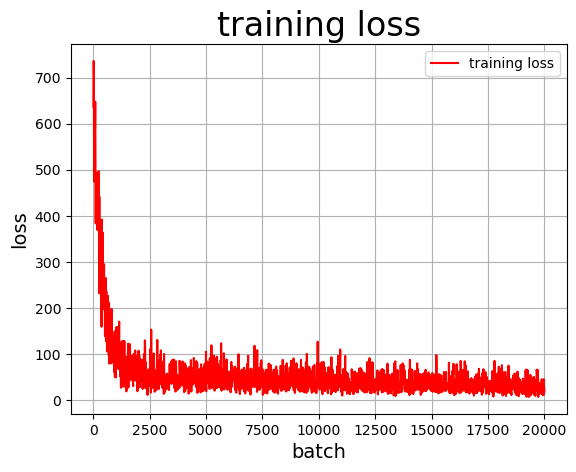

In [7]:
draw_train_loss(Batchs,all_train_loss)

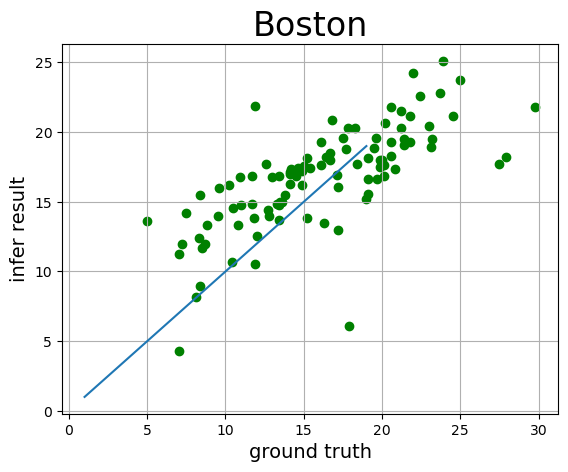

In [8]:
#绘制真实值和预测值对比图
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,20) 
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green', label='training cost') 
    plt.grid()
    plt.show()

draw_infer_result(groud_truths,infer_results)